In [2]:
import maiersaupe as ms
import defect as df
import numpy as np
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%reload_ext autoreload
%autoreload 2

# Disk

In [16]:
BC = 'tang' # 'tang' or 'free'
coord_num = 6 # 4 (square) or 6 (triangular)
p = 2 # any integer > 0
a = 5 # any integer from 1 to coord_num - 1
r = 5 # size; any float > 0
J = 1 # coupling coefficient

sites_rec = ms.prepare_lattice(coord_num)
alpha = 2 * np.pi * a/coord_num
LC = ms.Patic(J, p)
disk = ms.Disk(r=r, coord_num=coord_num, boundary_condition=BC, sites_rec=sites_rec)
m0, E0 = disk.get_ground_state_energy(LC, seed_num = 1)

(-5.5, 5.5, -4.76313972081441, 4.76313972081441)

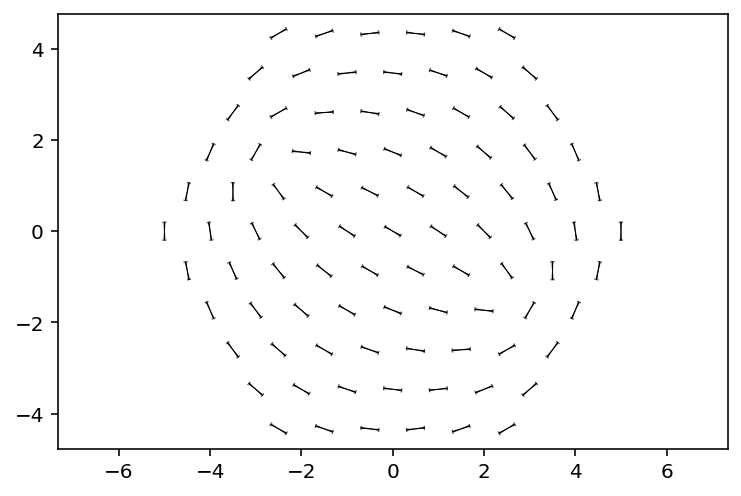

In [18]:
for i in range(p):
    plt.quiver(disk.lattice.real, disk.lattice.imag,
                    np.cos(m0 + i * 2 * np.pi / p),
                    np.sin(m0 + i * 2 * np.pi / p),
                    headwidth=0.5, scale=35, pivot='middle')
plt.axis('Equal')

# Cone

In [19]:
BC = 'tang' # 'tang' or 'free'
coord_num = 6 # 4 (square) or 6 (triangular)
p = 2 # any integer > 0
a = 5 # any integer from 1 to coord_num - 1
r = 5 # size; any float > 0
J = 1 # coupling coefficient

sites_rec = ms.prepare_lattice(coord_num)
alpha = 2 * np.pi * a/coord_num
LC = ms.Patic(J, p)
cone = ms.Cone(r=r, alpha=alpha, coord_num=coord_num, boundary_condition=BC, sites_rec=sites_rec)
m0, E0 = cone.get_ground_state_energy(LC, seed_num = 1)

(-5.5, 5.5, -4.76313972081441, 4.76313972081441)

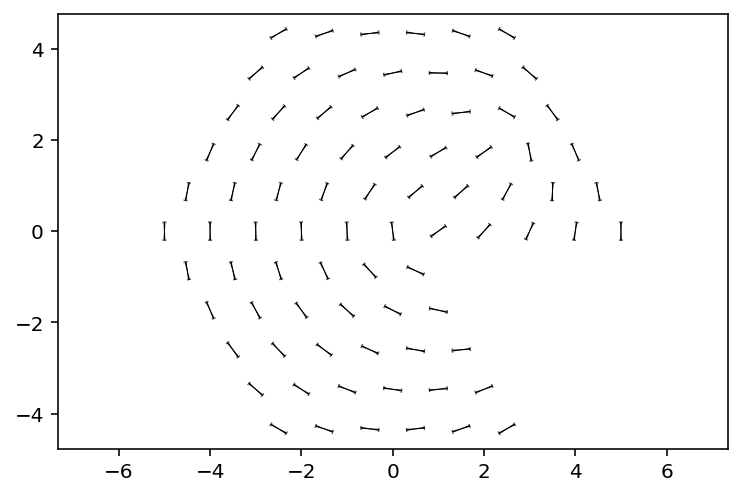

In [20]:
for i in range(p):
    plt.quiver(cone.lattice.real, cone.lattice.imag,
                    np.cos(m0 + i * 2 * np.pi / p),
                    np.sin(m0 + i * 2 * np.pi / p),
                    headwidth=0.5, scale=35, pivot='middle')
plt.axis('Equal')

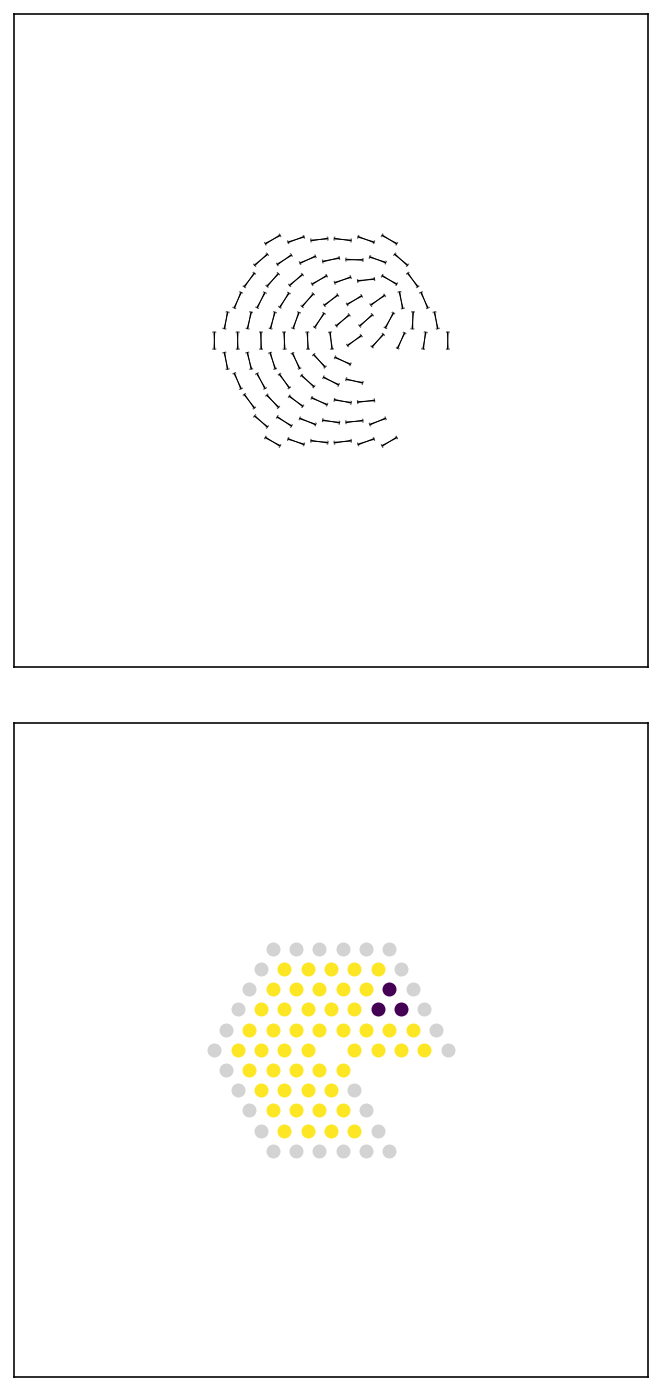

In [21]:
vorts = df.cone_plot(m0, cone, p)

# Hyperbolic cone

In [3]:
BC = 'tang' 
coord_num = 6
p = 2 
a = 3 
r = 6
J = 1

sites_rec = ms.prepare_lattice(coord_num)
alpha = 2 * np.pi * a/coord_num
LC = ms.Patic(J, p)
cone = ms.Cone(r=r, alpha=alpha, coord_num=coord_num, boundary_condition=BC, sites_rec=sites_rec)
disk_cut = ms.Disk(r=r, coord_num=coord_num, boundary_condition=BC, sites_rec=sites_rec, cut = True)
hyp = ms.Hyperbolic(bottom_layer = disk_cut, top_layer = cone)

In [4]:
m0_hyp, E0 = hyp.get_ground_state_energy(LC, seed_num = 1)

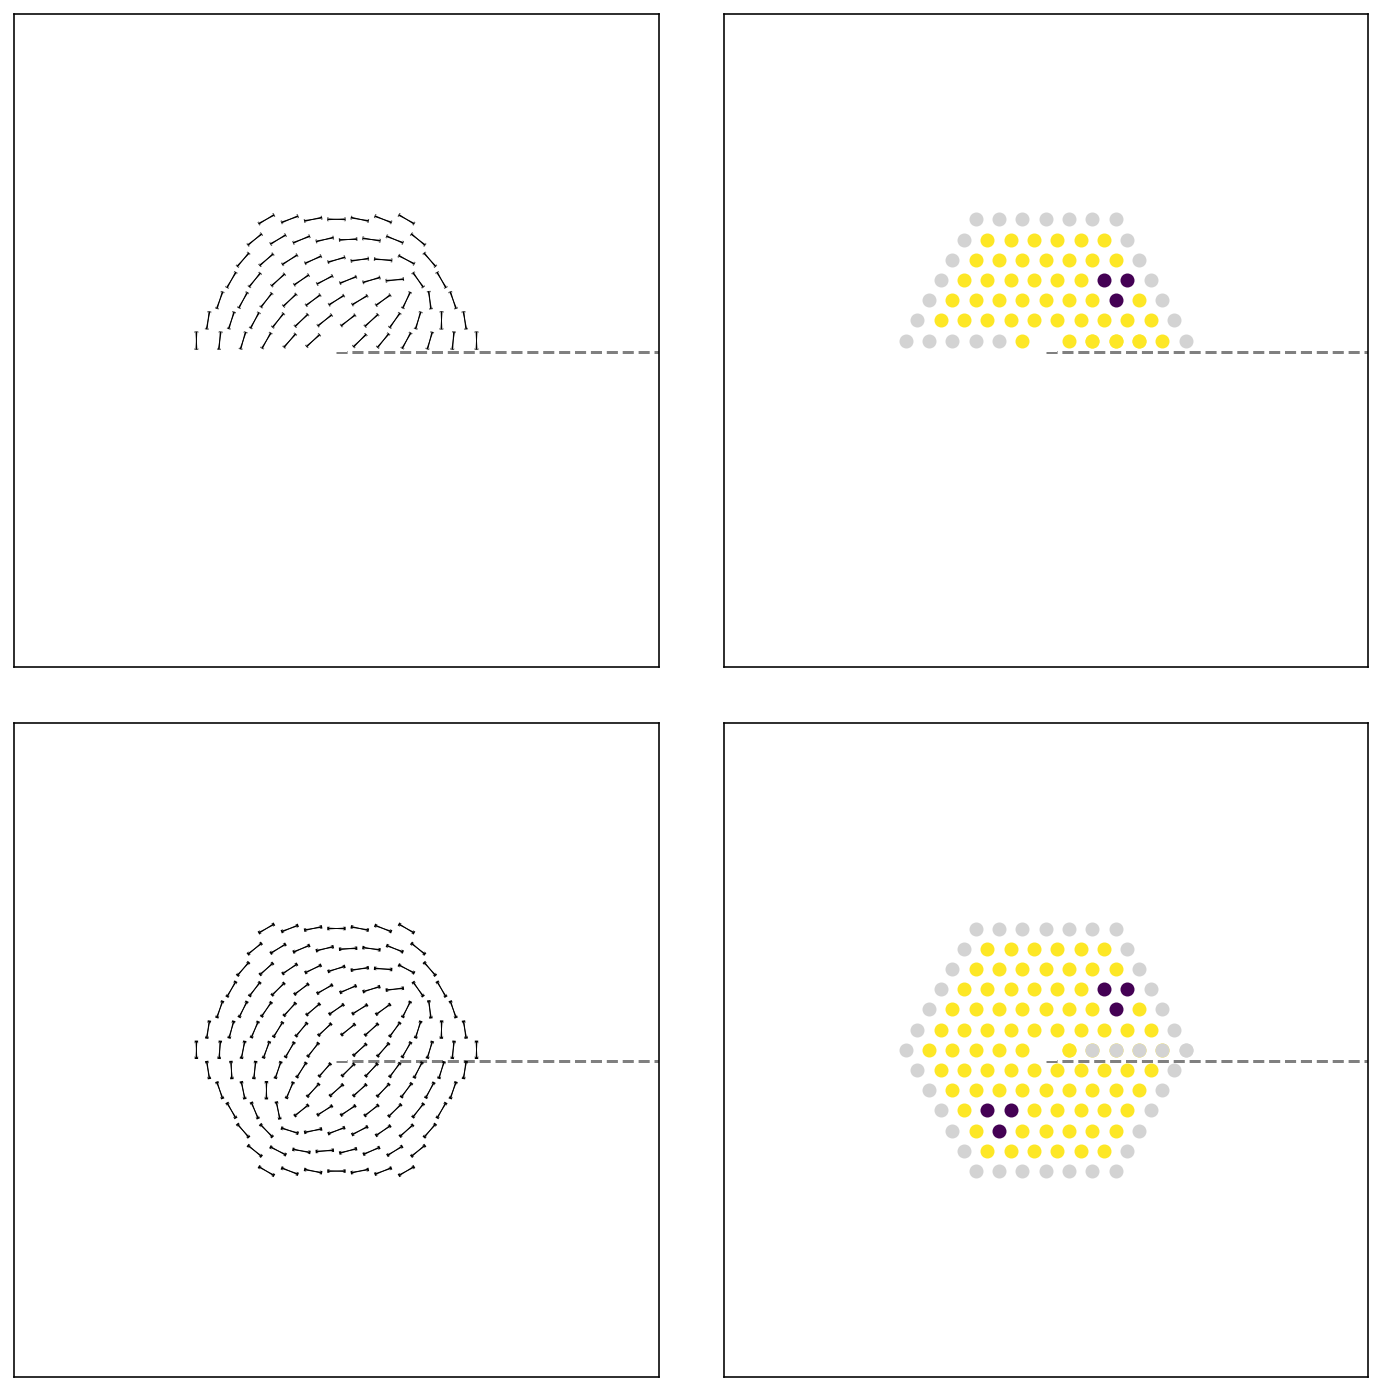

In [5]:
vorts = df.hyp_plot(m0_hyp, hyp, p)